**Predicting prices in the Sneaker Aftermarket**

**Introduction**

In this notebook we will look at data obtained from Stockx, an online marketplace for shoes. We will focus on transaction data for Adidas Yeezy sneakers, all to hopefully gain some insight into the sneaker aftermarket.

**The Sneaker Aftermarket**  

What is the Sneaker Aftermarket? 

Well, lets take a look at the primary market or the retail market first. The primary market is where sneakers are first released for retail to the general public, usually through major retailers like Nike stores, Adidas stores, Footlocker, and many more.

Though, for popular sneakers, you can expect a very limited supply that usually sells out almost immediately. This leaves many shoppers wanting such sold out sneakers that are no longer available in the primary market.

Enter, the aftermarket or the secondary market, which is where these shoes are sold once again, except now at a premium. Here, individual sellers who were able to purchase highly coveted sneakers from the primary market can list their sneakers for sale and resell them to buyers.

Sites like Stockx provide a platform for individual sellers to sell their goods on the aftermarket. 

Stock prides itself on being the 'Stock Market of Things', which got me thinking. We've seen how data science is applied to stock market analysis and stock market predictions, so would it be possible for shoes? Stockx keeps a lot of transaction data and I want to see if it can be used to predict the price on the aftermarket. 


**Yeezy**  

The shoes in question we will focus in this notebook are Yeezys. Founded by both Adidas and Kanye West, this line of sneakers features up to 6 different models (Yeezy 350, Yeezy 380, Yeezy 750, Yeezy 700, Yeezy 500, Yeezy Powerphase). They have grown to be one of the most coveted sneakers, which has made them very popular on the sneaker aftermarket, as some models sell upwards to about 200-300% above retail.

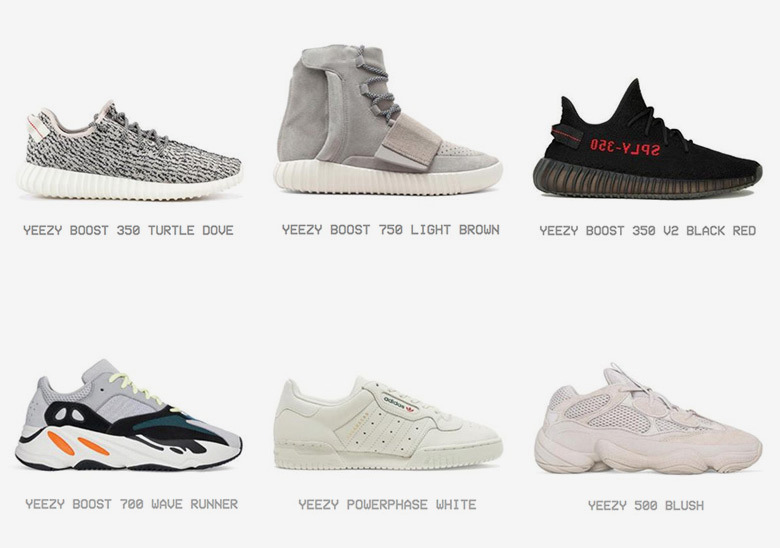

**Our goal?**  
Train a model to predict the price a yeezy shoe will sell for on the aftermarket.

**1. Data Collection**  
The code below contains everything needed to get transaction data for every mens Yeezy model. Feel free to modify how much data you want by changing up some of the parameters in 'params'. Lets skip this part and take a look at the CSV file that the code below produces.

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import time
headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'}
params = {'state':'480','currency':'USD','limit':'10000','page':'1','order':'DESC','country':'US'}

# Gets some quantitative and qualitative data about every mens yeezy shoe
identifying_data = pd.DataFrame()
for i in range(1,5):
    url = 'https://stockx.com/api/browse?_tags=yeezy,adidas&productCategory=sneakers&gender=men&page={}'.format(i)
    try:
        r = requests.get(url, headers=headers)
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        raise SystemExit(e)
    soup = BeautifulSoup(r.text, 'html.parser')
    data = json.loads(str(soup))    
    identifying_data = identifying_data.append(pd.json_normalize(data['Products']))
    time.sleep(5)
identifying_data = identifying_data.dropna(subset=['market.deadstockSold'])

# Gets actual transaction data, most importantly, how much and when a yeezy model sold for
df = pd.DataFrame()
count = 0
for i in identifying_data['urlKey']:
    names = []
    url = 'https://stockx.com/api/products/{}/activity'.format(i)
    try:
        r = requests.get(url, params=params, headers=headers)
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        raise SystemExit(e)
    soup = BeautifulSoup(r.text, 'html.parser')
    data = json.loads(soup.string)
    df1 = pd.json_normalize(data['ProductActivity'])
    df1['Color'] = identifying_data.iloc[count, 7]
    df1['Release Date'] = identifying_data.iloc[count, 19]
    df1['Traits'] = identifying_data.iloc[count, 28]
    df1['Retail'] = identifying_data.iloc[count, 22]
    df1['Model'] = identifying_data.iloc[count, 23]
    df1['Name'] = identifying_data.iloc[count, 27]
    df1['Annual High'] = identifying_data.iloc[count, 57]
    df1['Annual Low'] = identifying_data.iloc[count, 58]
    df1['Volatility'] = identifying_data.iloc[count, 61]
    df1['Total Sold'] = identifying_data.iloc[count, 62]
    df1['Total Dollars'] = identifying_data.iloc[count, 71]
    df = df.append(df1)
    count += 1
    time.sleep(7)

 Lets first read in the CSV file as a pandas dataframe and take a look at our dataset

In [32]:
# Reading in the data
import pandas as pd
df = pd.read_csv('stockx_yeezy_data.csv')
df.head()

,Unnamed: 0,chainId,amount,createdAt,shoeSize,productId,skuUuid,state,customerId,localAmount,...,Color,Release Date,Retail,Model,Name,Annual High,Annual Low,Volatility,Total Sold,Total Dollars
0,0,12479908586289232936,1900.0,2017-02-21T23:52:48+00:00,8.5,NaN,07c69548-8a79-427f-b3b2-14a3b0d463e8,480,NaN,1900,...,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0
1,1,12484419258910299232,1750.0,2017-02-28T16:45:47+00:00,8.5,NaN,07c69548-8a79-427f-b3b2-14a3b0d463e8,480,NaN,1750,...,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0
2,2,12482557743936126591,1405.0,2017-03-07T03:56:36+00:00,8.5,NaN,07c69548-8a79-427f-b3b2-14a3b0d463e8,480,NaN,1405,...,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0
3,3,12486416309791974108,1295.0,2017-03-20T03:36:58+00:00,8.5,NaN,07c69548-8a79-427f-b3b2-14a3b0d463e8,480,NaN,1295,...,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0
4,4,12518755073694717688,1250.0,2017-04-16T14:30:30+00:00,8.5,NaN,07c69548-8a79-427f-b3b2-14a3b0d463e8,480,NaN,1250,...,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0


From our dataset, you can see we have 491,235 rows and 21 columns. 

That means that we have data on 491,235 different Yeezy sales.

Each transaction has 21 columns, but the columns that we will focus on in this notebook are:
1. createdAt - Date the shoe was sold
2. shoeSize - Size of the shoe
3. localAmount - The price paid for the shoe (resell price)
4. Color - Color of the shoe
5. Release Date - Date the shoe originally released in the primary market
6. Retail - The original price (retail price)
6. Model - The Model (Yeezy 350, 380, 500, 700...)
7. Name - Name of the shoe
8. Annual High - The maximum yearly price the shoe sold for
9. Annual High - The minimum yearly price
10. Volatility - Rate at which the selling prices of the shoe changed
11. Total Sold - How many units sold on stockx
12. Total Dollars - Sum of all resell prices that the shoe sold on stockx

**2. Data Cleaning**  
Taking a quick look at the data, you may notice that some cleaning needs to be done. 

1. Delete some columns - because some have useless information

In [33]:
# Gets rid of the columns that we do not want
df = df.drop(columns=['Unnamed: 0','chainId', 'amount', 'productId', 'skuUuid', 'state', 'customerId', 'localCurrency',])

2. Convert columns to an appropriate type - for easier data manipulation

In [34]:
# Converts columns to a datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['Release Date'] = pd.to_datetime(df['Release Date'])

3. Get rid of or change empty data points - to avoid errors from learning models

In [35]:
# Check which columns have missing values and how many are missing
pd.isnull(df).sum()

createdAt           0
shoeSize            0
localAmount         0
Color               0
Release Date      159
Retail              0
Model               0
Name                0
Annual High         0
Annual Low       2779
Volatility          0
Total Sold          0
Total Dollars       0
dtype: int64

In [36]:
# Gets rid of the shoes that have not released yet.
df = df.dropna(subset=['Release Date'])

# Replaces NaN elements with 0
df = df.fillna(0)

**3. Feature Engineering**  
Here we will create more influential variables from the existing raw data by creating new columns. This will help us categorize our dataset, and potentially help us gain insight into some good predictors for our training model.

Lets first do some manual one hot encodings, which are a representation of categorical variables as binary values
1. df['white_cw'] - 1 if white in 'Color', 0 if not
2. df['black_cw'] - 1 if black in 'Color', 0 if not
3. df['350'] - 1 if 350 in 'Name', 0 if not
4. df['Static'] - 1 if reflective in 'Name', 0 if not

I believe that whether or not a shoe is white or black, a 350 model (the most popular model), Static (special color of a model that has reflective accents and are much more limited than their non-reflective counterparts), are all useful predictors of resell prices

In [37]:
# Makes new column checking if White is found in the Color column
df['is_white'] = [1 if 'White' in x else 0 for x in df['Color']]

# Makes new columns checking if Black is found in the Color column
df['is_black'] = [1 if 'Black' in x else 0 for x in df['Color']]

# Makes new columns checking if V2 is found in the Model column
df['350'] = [1 if '350' in x else 0 for x in df['Name']]

# Makes new columns checking if Reflective is found in the Name column
df['Static'] = [1 if 'Static' in x else 0 for x in df['Name']]

#df['Reflective'] = df['Name'].apply(lambda x: 1 if '(Reflective)' in x else (1 if 'Reflective' in x else 0))

In [7]:
#df['Model2'] = df['Model'].str.extract(r'([\d]{3})')
#df = df.fillna({'Model2':'Other'})

In [8]:
#df = pd.get_dummies(df,columns=['Model2'])

Now lets quantify some columns for our training models to interact with:

1. df['Days_sold'] - Calculated by subtracting the Sale date by Release date. This allows us to compare shoes by how long after release they were sold.
2. df['Price_sold'] - Calculated by dividing the Sale price by Retail price. This allows us to standardize each shoe to its retail, since  Yeezys have varying retail prices.


In [38]:
# Makes new column by subtracting the two dates, getting only the computated days
df['days_until_sold'] = (df['createdAt'].sub(df['Release Date'])).dt.days

# Makes new column by dividing the two prices
df['price_ratio'] = (df['localAmount'])/(df['Retail'])

In [39]:
df.head()

,createdAt,shoeSize,localAmount,Color,Release Date,Retail,Model,Name,Annual High,Annual Low,Volatility,Total Sold,Total Dollars,is_white,is_black,350,Static,days_until_sold,price_ratio
0,2017-02-21 23:52:48+00:00,8.5,1900,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0,1,1,1,0,-5,8.636364
1,2017-02-28 16:45:47+00:00,8.5,1750,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0,1,1,1,0,2,7.954545
2,2017-03-07 03:56:36+00:00,8.5,1405,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0,1,1,1,0,9,6.386364
3,2017-03-20 03:36:58+00:00,8.5,1295,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0,1,1,1,0,22,5.886364
4,2017-04-16 14:30:30+00:00,8.5,1250,White/Core Black/Red,2017-02-25 23:59:59,220.0,adidas Yeezy Boost 350 V2,adidas Yeezy Boost 350 V2 Zebra,795.0,240.0,0.093012,43852.0,14898400.0,1,1,1,0,49,5.681818


**Data analysis**  
Now lets take a look at our dataset and examine some interesting relations within the dataset

Lets first take a look at our target variable, price_ratio. From the histogram below, we see that it is right skewed. Clearly there are some really big outliers within the dataset.

In [9]:
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = [16,9]

Text(0.5, 1.0, 'Distribution of Sales')

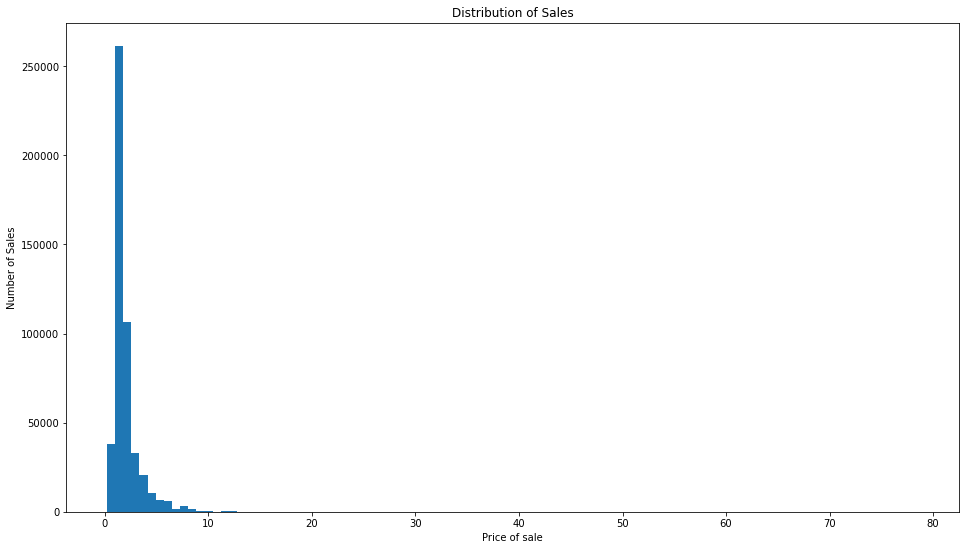

In [40]:
import matplotlib.pyplot as plt 
plt.hist(x=df['price_ratio'], bins=100)

plt.xlabel('Price of sale')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sales')

Now lets look at one of our categorical variables, 'Model', and its relation to our target variable. You may notice that 350 models, on average, tend to have some of the highest price ratios. 

<BarContainer object of 19 artists>

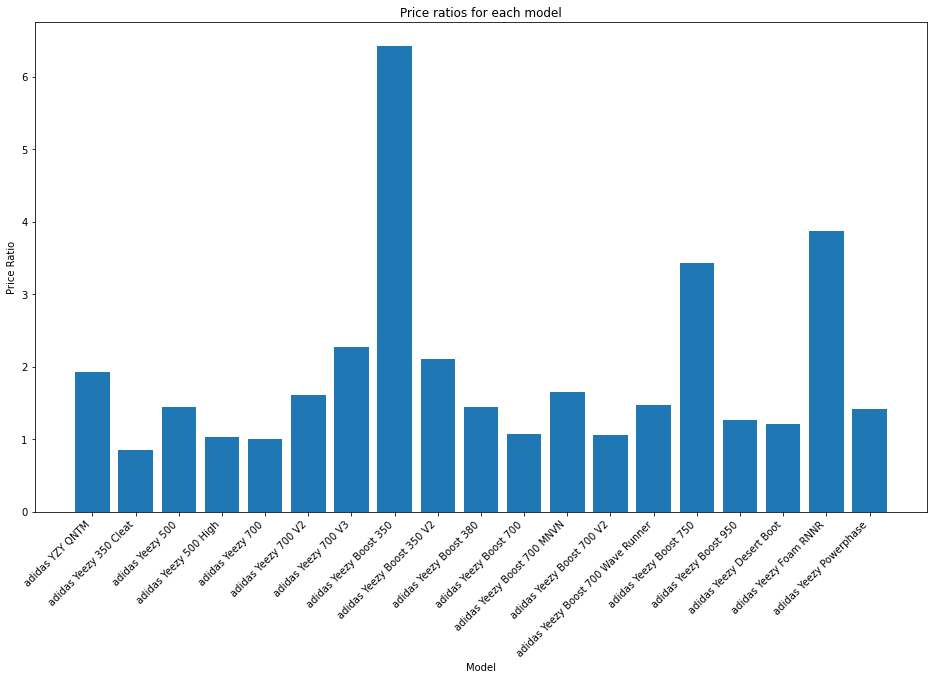

In [41]:
grouped = df.groupby('Model')
x = []
y = []
for i,bin in grouped:
    group = grouped.get_group(i)
    x.append(i)
    y.append(group['price_ratio'].mean())
plt.xticks(rotation=45, ha='right')
plt.title('Price ratios for each model')
plt.xlabel('Model')
plt.ylabel('Price Ratio')
plt.bar(x,y)

In [12]:
color_values = df.groupby('Color').size().nlargest(5)
color_values

Color
Static/Static/Static                  34460
Grey/Grey/Grey                        32480
Salt/Salt/Salt                        20206
Blue Tint/Grey Three/High Risk Red    20000
Blush/Blush/Blush                     20000
dtype: int64

In [13]:
df["Color"].value_counts().to_frame().head(n=5)

,Color
Static/Static/Static,34460
Grey/Grey/Grey,32480
Salt/Salt/Salt,20206
Blush/Blush/Blush,20000
Grey/Bold Orange/Dark Grey,20000


Now lets look at one of our numerical variables and their relation to our target variable. 

The heatmap below plots the correlation data between our variables. You may notice that Annual High, Annual Low, is_black, days_until_sold have some of the strongest positive correlation with our target variable.

LocalAmount has a positive correlation, but must be disregarded since it is directly related to price_ratio and thus not a good predictor.

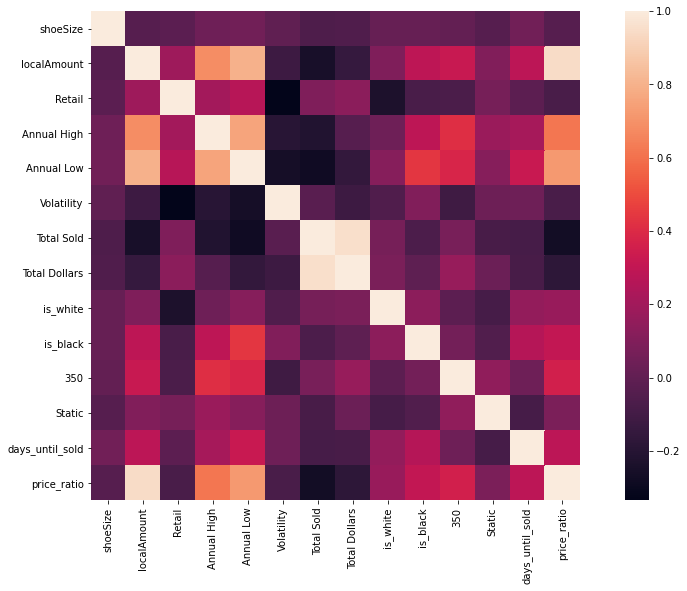

In [14]:
import seaborn as sns
import numpy as np

# Make a new dataframe, consisting of only columns that are numerical
numerical = df.select_dtypes(include=[np.number])
corr = numerical.corr()
sns.heatmap(corr,square=True)

In [15]:
corr

,shoeSize,localAmount,Retail,Annual High,Annual Low,Volatility,Total Sold,Total Dollars,is_white,is_black,350,Static,days_until_sold,price_ratio
shoeSize,1.000000,-0.034040,-0.018138,0.043257,0.053645,-0.003941,-0.058769,-0.054049,0.016919,0.016013,0.007335,-0.032904,0.054933,-0.032731
localAmount,-0.034040,1.000000,0.188779,0.684746,0.797130,-0.116144,-0.246750,-0.145108,0.092942,0.288643,0.318114,0.101822,0.282630,0.945043
Retail,-0.018138,0.188779,1.000000,0.204439,0.265161,-0.334810,0.093847,0.132985,-0.233395,-0.074635,-0.072043,0.071808,-0.015671,-0.078229
Annual High,0.043257,0.684746,0.204439,1.000000,0.757629,-0.193593,-0.217600,-0.034445,0.042052,0.286530,0.415975,0.180736,0.216902,0.619168
Annual Low,0.053645,0.797130,0.265161,0.757629,1.000000,-0.257214,-0.281419,-0.155236,0.115505,0.437701,0.381372,0.113696,0.325368,0.722766
Volatility,-0.003941,-0.116144,-0.334810,-0.193593,-0.257214,1.000000,-0.024666,-0.116580,-0.056458,0.100900,-0.112545,0.037206,0.045494,-0.074649
Total Sold,-0.058769,-0.246750,0.093847,-0.217600,-0.281419,-0.024666,1.000000,0.956442,0.070519,-0.065438,0.077054,-0.079571,-0.089143,-0.269435
Total Dollars,-0.054049,-0.145108,0.132985,-0.034445,-0.155236,-0.116580,0.956442,1.000000,0.080911,-0.008001,0.165801,0.032354,-0.080686,-0.175199
is_white,0.016919,0.092942,-0.233395,0.042052,0.115505,-0.056458,0.070519,0.080911,1.000000,0.136891,-0.012604,-0.087662,0.158469,0.172526
is_black,0.016013,0.288643,-0.074635,0.286530,0.437701,0.100900,-0.065438,-0.008001,0.136891,1.000000,0.056350,-0.051567,0.261502,0.302886


**Modeling**  
Now, after all our data cleaning, feature engineering, and some new insight into what features are good predictors of our target variable, we will now start our predictive modeling. 

We will first train a multiple linear regression model to predict our target variable, price_ratio. Multiple linear regression is like Linear Regression, except it can handle more than 1 feature.

However, because it can handle more than 1 feature, its imperative that features cannot be correlated to each other. So to avoid [multicollinearity](https://www.statisticssolutions.com/multicollinearity/), we must first drop 'localAmount' and 'Retail', which are directly related to our target variable. Also, price_ratio is a much better indicator of these 2 values anyway. 'Total Sold' and 'Total Dollars' must also be dropped because they are also correlated to each other. Lastly, 'Model', 'Name', and 'Color' will be dropped since we have the most popular model, 350, and most popular color, static, as one hot encodings.


In [16]:
df = df.drop(columns=['localAmount','Retail','Total Sold','Total Dollars', 'createdAt','Release Date','Model','Name','Color'])

Now lets split the dataset into training and testing data

In [81]:
from sklearn.model_selection import train_test_split

In [19]:
# Seperate the features and target
X = df.drop(columns=['price_ratio'])
y = df['price_ratio']

# Run train_test_split to create 4 different 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

Residuals:
    Min      1Q  Median      3Q     Max
-51.167 -0.2355   0.139  0.4175  6.3449


Coefficients:
            Estimate  Std. Error   t value  p value
_intercept  0.197008    0.006556   30.0481      0.0
x1         -0.044169    0.000345 -128.1729      0.0
x2          0.000448    0.000002  207.5798      0.0
x3          0.005185    0.000014  383.9662      0.0
x4          1.584847    0.013300  119.1639      0.0
x5          0.496826    0.005153   96.4200      0.0
x6         -0.198249    0.004342  -45.6637      0.0
x7          0.203678    0.003126   65.1513      0.0
x8         -0.122018    0.005384  -22.6616      0.0
x9          0.000221    0.000006   39.0533      0.0
---
R-squared:  0.57419,    Adjusted R-squared:  0.57419
F-statistic: 58861.71 on 9 features


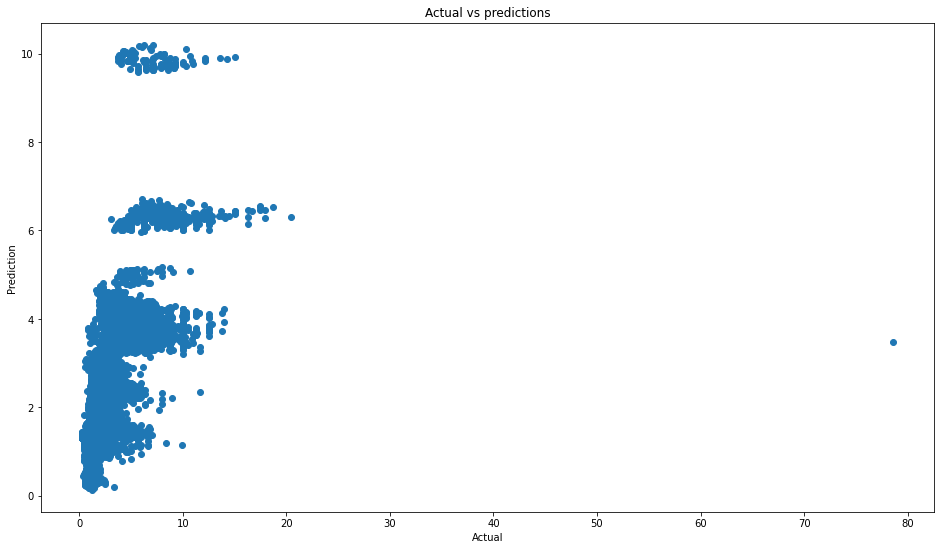

In [100]:
from sklearn import linear_model
from statistics import *
from scipy import stats
import regressors
from regressors import stats as stats_reg

# Define the multiple linear regression model
lr = linear_model.LinearRegression()

# Fitting the model 
lr.fit(X_train,y_train)

# predict with the data
y_pred = lml.predict(X_test)

# Make scatter plot of actual vs predictions
plt.scatter(y_test, y_pred)
plt.title('Actual vs predictions')
plt.xlabel('Actual')
plt.ylabel('Prediction')

# Get summary of our model
stats_reg.summary(lr, X_train, y_train)

Based on these results, while the parameter estimates are still valid, this model should not be used to predict on new data.

Conclusions

In this analysis, we used sneaker transaction data from StockX to understand what drives the resell prices in the sneaker aftermarket. Although we failed our modeling attempt with linear regression, the best course of action is to purse another model. Perhaps one that does not have strict assumptoopms like those of lienar regression. 

We were able to determine the most important factors in predicting the hype of a sneaker, such as number of days after release or whether a shoe was a Yeezy Boost 350 V2 or not.